# Plot Viual Odometry

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from copy import copy

def transform(t_x, t_y, t_z, r_x, r_y, r_z, r_w):
    return np.asarray(
        [[1-2*r_y**2-2*r_z**2, 2*r_x*r_y-2*r_z*r_w, 2*r_x*r_z+2*r_y*r_w, t_x],
         [2*r_x*r_y+2*r_z*r_w, 1-2*r_x**2-2*r_z**2, 2*r_y*r_z-2*r_x*r_w, t_y],
         [2*r_x*r_z-2*r_y*r_w, 2*r_y*r_z+2*r_x*r_w, 1-2*r_x**2-2*r_y**2, t_z],
         [0,0,0,1]])
# https://en.wikipedia.org/wiki/Rotation_matrix#General_rotations

In [2]:
df = pd.read_csv("/home/torsten/ms/data/rosbag2_2024_01_05-12_47_24/vo_pose.csv")
df

,timestamp,t_x,t_y,t_z,r_x,r_y,r_z,r_w
0,1704451644772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,1704451644839,-0.000363,-0.000156,-0.000661,0.000014,0.000147,-0.000370,1.000000
2,1704451644905,-0.000375,-0.000179,-0.000686,0.000012,0.000148,-0.000360,1.000000
3,1704451644972,-0.000443,0.001768,0.002395,0.000074,0.000204,-0.000577,1.000000
4,1704451645039,-0.001127,0.002873,0.004099,0.000063,0.000011,-0.000937,1.000000
...,...,...,...,...,...,...,...,...
7576,1704452275407,-194.485081,-2.420731,10.238093,0.050732,0.707770,0.291702,0.641403
7577,1704452275877,-194.484930,-2.419681,10.238637,0.050834,0.707766,0.291461,0.641509
7578,1704452276007,-194.485787,-2.419707,10.238919,0.050766,0.707768,0.291299,0.641585
7579,1704452276874,-194.485495,-2.419526,10.239060,0.050693,0.707756,0.291392,0.641563


In [3]:
#df_kf = pd.read_csv("/home/torsten/ms/data/rosbag2_2023_11_07-15_41_39/kf.csv")
#df_kf = df_kf.iloc[1:]
#df_kf

In [4]:
poses = []
poses_kf = []
last_tf = transform(0,0,0,0,0,0,1)

vo_T_robot = np.asarray([[ 0,  0, 1, 0],
                         [-1,  0, 0, 0],
                         [ 0, -1, 0, 0],
                         [ 0,  0, 0, 1]], dtype=float)

vTr_inv = np.linalg.inv(vo_T_robot)

"""
for i, row in df.iterrows():
    tf = transform(row["t_x"], row["t_y"], row["t_z"], row["r_x"], row["r_y"], row["r_z"], row["r_w"])
    # Convert to robot frame
    tf = np.matmul(vo_T_robot, tf)
    tf = np.matmul(tf, vTr_inv)
    last_tf = np.matmul(last_tf, tf)
    poses.append(copy(last_tf))

# Get transform of first keyframe
for index, row in df.iterrows():
    if row["timestamp"] >= df_kf.iloc[0, 0]:
        print(row["timestamp"])
        print(df_kf.iloc[0, 0])
        last_tf = poses[index]
        print(index)
        print(last_tf)
        break

#last_tf = transform(0,0,0,0,0,0,1)
for i, row in df_kf.iloc[1:].iterrows():
    tf = transform(row["t_x"], row["t_y"], row["t_z"], row["r_x"], row["r_y"], row["r_z"], row["r_w"])
    # Convert to robot frame
    tf = np.matmul(vo_T_robot, tf)
    tf = np.matmul(tf, vTr_inv)
    last_tf = np.matmul(last_tf, tf)
    poses_kf.append(copy(last_tf))
"""

    
print(last_tf)


    

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [5]:
"""
poses.append(transform(0,0,0,0,0,0,1))

for i in range(3):
    tf =transform(0.2,0,0,0,0.707,0,0.707)
    last_tf = np.matmul(tf, last_tf)
    poses.append(copy(last_tf))

#poses.append(transform(2,0,0,0,0,0,1))
#poses.append(transform(3,0,0,0,0,0,1))
"""


'\nposes.append(transform(0,0,0,0,0,0,1))\n\nfor i in range(3):\n    tf =transform(0.2,0,0,0,0.707,0,0.707)\n    last_tf = np.matmul(tf, last_tf)\n    poses.append(copy(last_tf))\n\n#poses.append(transform(2,0,0,0,0,0,1))\n#poses.append(transform(3,0,0,0,0,0,1))\n'

In [6]:
poses = np.asarray(poses)
poses.shape

(0,)

In [7]:
poses_kf = np.asarray(poses_kf)
poses_kf.shape

(0,)

In [8]:
"""
%matplotlib tk
plt.figure(figsize=(10,6))
plt.axis('equal')
plt.plot(poses[:, 0, 3], poses[:,1,3], "-x")
#plt.plot(poses_kf[:, 0, 3], poses_kf[:,1,3], "-x")
for i in range(0, poses.shape[0], 100):
    plt.text(poses[i,0,3], poses[i,1,3], str(i))
plt.show()
"""

'\n%matplotlib tk\nplt.figure(figsize=(10,6))\nplt.axis(\'equal\')\nplt.plot(poses[:, 0, 3], poses[:,1,3], "-x")\n#plt.plot(poses_kf[:, 0, 3], poses_kf[:,1,3], "-x")\nfor i in range(0, poses.shape[0], 100):\n    plt.text(poses[i,0,3], poses[i,1,3], str(i))\nplt.show()\n'

In [9]:
#df = pd.read_csv("gpsNED.csv")
#df

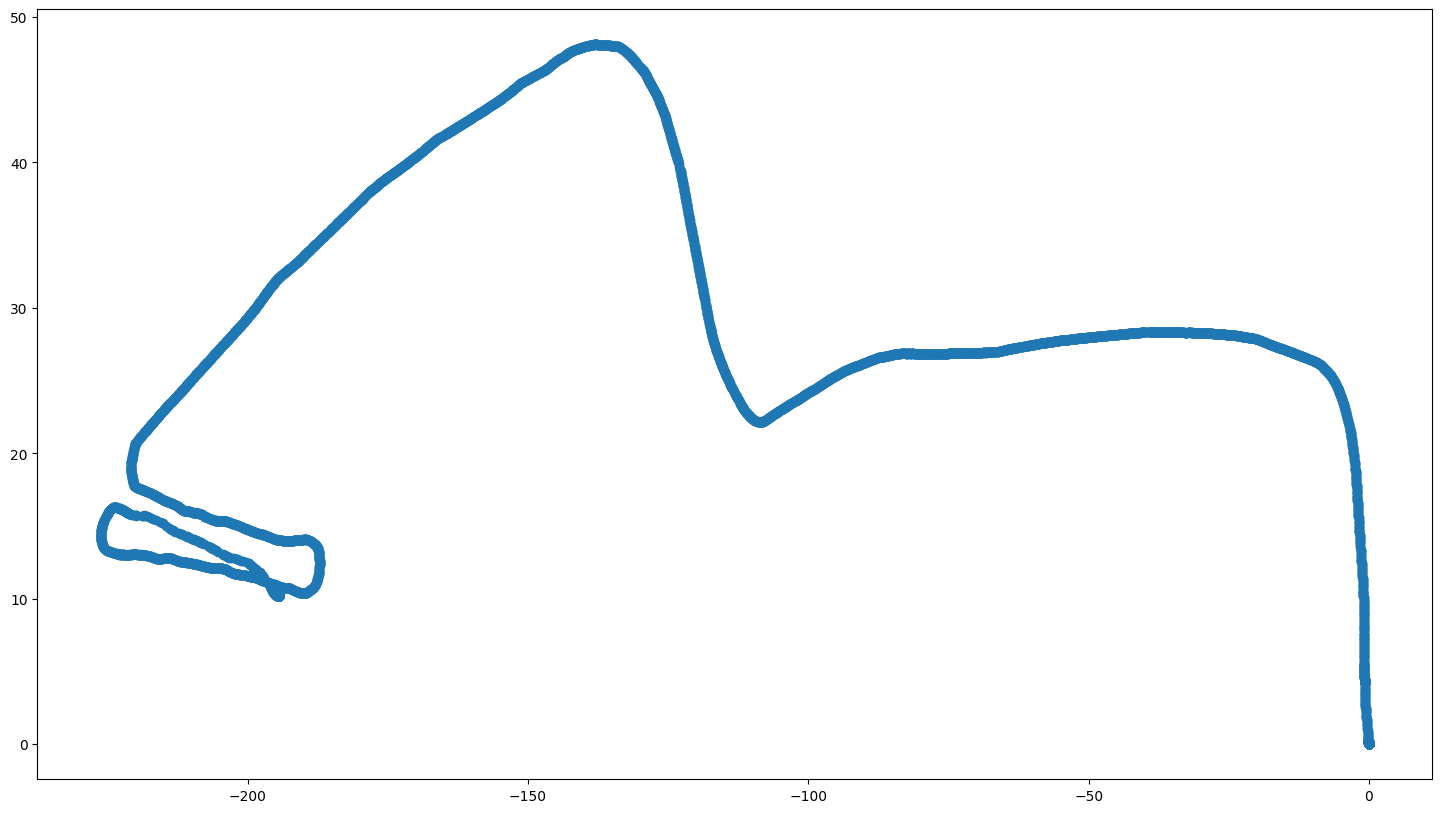

In [10]:

plt.figure(figsize=(18,10))
plt.scatter(df.iloc[:,1], df.iloc[:,3])
plt.show()
